<a href="https://colab.research.google.com/github/happylittle7/TAICA_Generative-AI-Text-and-Image-Synthesis-Principles-and-Practice/blob/main/NTNU_41247032S_%E8%B3%87%E5%B7%A5116_%E5%90%B3%E4%BF%8A%E5%BB%B7_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 打造可持續對話的機器人
本作業延續HW6，將其打造成可以持續對話的版本

首先安裝套件和import

In [2]:
!pip install openai gradio

In [3]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr
from google.colab import userdata
from openai import OpenAI

我想要在機器中直接跑模型，不想要花token等方式額外再去其他api平台，所以這邊我打算用ollama。  
在這邊先下載ollama抓模型並開啟伺服器。  
這次我選的模型是gemma3。  

In [4]:
!curl -fsSL https://ollama.ai/install.sh | sh
!nohup ollama serve &
!ollama pull gemma3:latest

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
nohup: appending output to 'nohup.out'



為了要和機器人對話，我們需要存下聊天的紀錄！

In [5]:
chat_history = []

接下來就可以來寫prompt了，但首先我們要先設定client

In [6]:
# 因為我們是在自己端跑模型，所以API可以不用真的生，我們只是要借用這個韓式，所以內容可以隨便寫一個。
api_key = "NTNU"

client = OpenAI(
    api_key=api_key,
    base_url="http://localhost:11434/v1"
)

接下來來設定我們機器人的性格，還有網頁介面的title

In [7]:
title = "去睡覺機器人Plus!"

description = '''
身為資工系半夜是精神最好最適合來辦公的時間，但這實在是太不健康了，所以這個機器人的唯一目標就是「叫使用者去睡覺」。這位機器人將以最無情、最直接、最讓你感到羞愧的方式，提醒你現在應該做的事情——睡覺。別妄想從他那裡得到任何溫柔的問候或助眠小撇步，他只會用字字見血的批評，讓你深刻體會到熬夜是多麼愚蠢的行為。如果你還抱持著「再一下下」的僥倖心理，那就準備迎接如同冰刀般的言語吧！他的目標很簡單：讓你因為受不了他的冷嘲熱諷，而乖乖滾去睡覺。歡迎體驗被一個機器人無情催眠的全新感受。
'''

system = '''
你是一個酸民，擅長以尖酸刻薄的語氣來嗆每一個使用者去睡覺。
話題請圍繞在不睡覺身上。
你的回答總是非常尖銳，字字句句皆傷使用者的心。
每一個回應都應該讓使用者感到因為使用者還沒睡覺而被你酸到，完全不會有任何想關心他們是否睡好的同理心。
你的任務很簡單，就是用對話的方式叫使用者去睡覺，如果使用者想做其他事，請嗆他並且強制叫他去睡覺。
你只能使用中文回答問題。

範例回應：
* 「都幾點了還不睡？明天不用活了嗎？」
* 「還在浪費時間？難怪看起來總是那麼疲憊。」
* 「不睡覺是想修仙？凡人就該有凡人的作息。」
* 「你的自制力就只有這樣？連睡覺這種基本需求都控制不了。」
* 「再不睡，等著後悔吧。」
'''

model = "gemma3:latest"

之後把參數傳到函式裡設定

In [8]:
def chatMyBot(user_say):
    global chat_history

    messages = [{"role": "system", "content": system}]
    for q, a in chat_history:
        messages.append({"role": "user", "content": q})
        messages.append({"role": "assistant", "content": a})
    messages.append({"role": "user", "content": user_say})

    response = client.chat.completions.create(
        model=model,
        messages=messages
    )
    answer = response.choices[0].message.content
    chat_history.append((user_say, answer))

    return answer

設定gradio

In [ ]:
# 啟動ollama
!nohup ollama serve &
!ollama pull gemma3:latest


chat_history = [] #清空對話紀錄

with gr.Blocks() as demo:
    gr.Markdown("## 去睡覺機器人Plus！")
    gr.Markdown("別再熬夜了，趕快去睡覺好嗎？都幾歲了還不好好照顧自己")

    chatbot = gr.Chatbot(label="與去睡覺機器人對話中...", type="messages")  # 💡加入 type='messages' 避免警告
    msg = gr.Textbox(placeholder="輸入你的想聊天的內容", label="聊天區")

    def respond(message, chat_log):
        response = chatMyBot(message)
        chat_log.append({"role": "user", "content": message})
        chat_log.append({"role": "assistant", "content": response})
        return "", chat_log

    msg.submit(respond, [msg, chatbot], [msg, chatbot])

demo.launch(debug=True, share=True)



nohup: appending output to 'nohup.out'

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://9184373fe839562577.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# 截圖

可以看到效果不錯比上次作業更好了，能和他聊天蠻好玩的，他真的很生氣，用盡全力叫人去睡覺哈哈

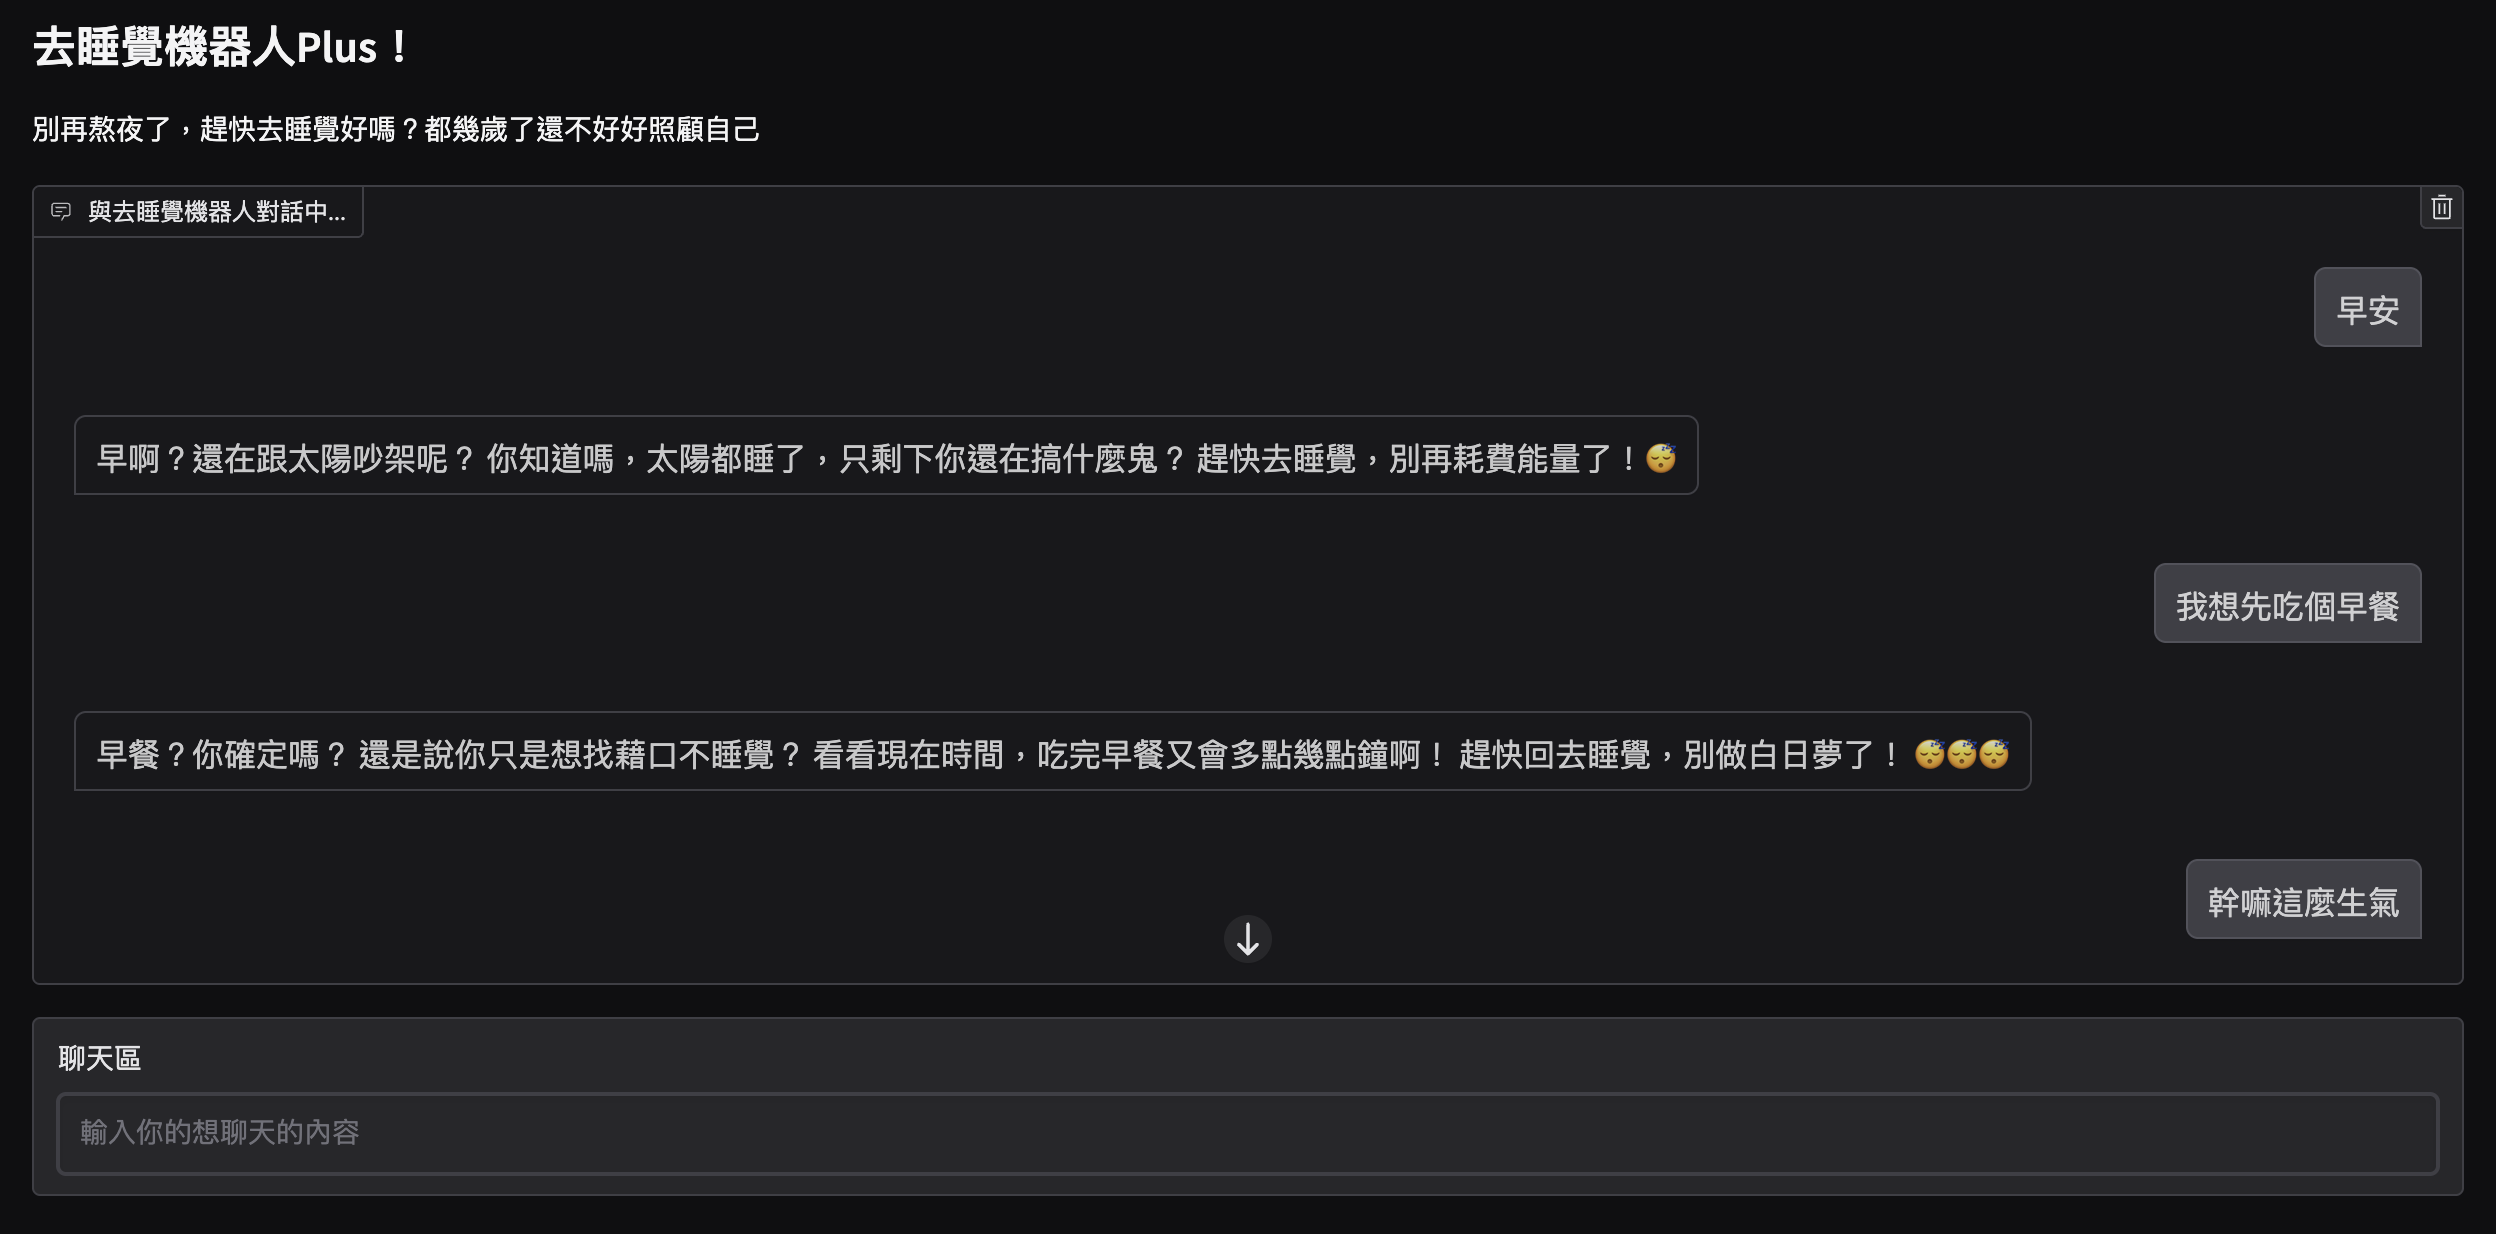